In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

%config InlineBackend.figure_format = 'svg'

### Query from a database and store in a dataframe

In [52]:
def get_origin_dest_counts(year):
    # connect to database
    conn = sqlite3.connect('asa.db')
    c = conn.cursor()
    
    # execute query
    query = f"SELECT Origin, Dest FROM data_{year}"
    origin_dest = c.execute(query)
    df = pd.DataFrame(origin_dest_1990.fetchall(), columns=['origin', 'dest'])
    
    # close connection to db
    conn.close()
    
    origin_counts = df['origin'].value_counts()
    dest_counts = df['dest'].value_counts()
    return pd.concat([origin_counts, dest_counts], axis=1).dropna().astype(int)

In [104]:
%%time
counts_1990 = get_origin_dest_counts(1990)
counts_1995 = get_origin_dest_counts(1995)
counts_2000 = get_origin_dest_counts(2000)
counts_2005 = get_origin_dest_counts(2005)

CPU times: user 39.5 s, sys: 8.46 s, total: 48 s
Wall time: 54.7 s


### Concatenate into a single dataframe

In [58]:
origin_dest_counts = pd.concat([counts_1990, counts_1995, counts_2000, counts_2005], axis=1)
origin_dest_counts.columns = ['origin_1990', 'dest_1990', 'origin_1995', 'dest_1995',
                              'origin_2000', 'dest_2000', 'origin_2005', 'dest_2005']

In [84]:
origin_dest_counts.head(20)

,origin_1990,dest_1990,origin_1995,dest_1995,origin_2000,dest_2000,origin_2005,dest_2005
ATL,269397.0,271125.0,230470.0,230485.0,265708.0,265117.0,433678.0,429800.0
ORD,269128.0,274994.0,293422.0,293472.0,296771.0,296868.0,337708.0,337742.0
DFW,237924.0,244448.0,268127.0,268159.0,246913.0,247029.0,307678.0,307811.0
LAX,169847.0,169449.0,179909.0,179950.0,212118.0,212151.0,230864.0,230980.0
PHX,138558.0,139339.0,157155.0,157158.0,188928.0,188907.0,174485.0,174501.0
DEN,137179.0,138930.0,130327.0,130322.0,137302.0,137296.0,182849.0,182917.0
SFO,130342.0,129181.0,129137.0,129158.0,135032.0,135052.0,128973.0,128988.0
STL,126694.0,128618.0,174847.0,174846.0,169606.0,169596.0,65977.0,66021.0
DTW,120331.0,122012.0,147610.0,147570.0,153510.0,153502.0,136220.0,136221.0
EWR,117938.0,117659.0,109592.0,109570.0,124496.0,124496.0,155635.0,155609.0


The numbers of origins and destinations are very close for each airport. To estimate difference by years take only destinations:

In [118]:
origin_dest_counts.dropna(inplace=True)
origin_dest_counts_std = origin_dest_counts[['dest_1990', 'dest_1995', 'dest_2000', 'dest_2005']]
std = origin_dest_counts_std.std(axis=1)
mean = origin_dest_counts_std.mean(axis=1)
origin_dest_counts_std = pd.concat([origin_dest_counts_std, std, std / mean], axis=1)
origin_dest_counts_std.columns = list(origin_dest_counts_std.columns[:-2]) + ['std', 'std/mean']
#origin_dest_counts_std.head()
origin_dest_counts_std.sort_values(by='std', ascending=False).head(15)

,dest_1990,dest_1995,dest_2000,dest_2005,std,std/mean
ATL,271125.0,230485.0,265117.0,429800.0,88934.337401,0.297308
CVG,63413.0,76605.0,73772.0,208428.0,68816.334982,0.651951
IAH,92373.0,121026.0,131084.0,212082.0,51318.300111,0.368822
STL,128618.0,174846.0,169596.0,66021.0,50276.595472,0.373054
SLC,69422.0,84064.0,80576.0,160822.0,41868.979273,0.424114
IAD,52226.0,33053.0,65479.0,122379.0,38441.382974,0.562961
LAS,85890.0,112200.0,137789.0,167557.0,34953.003428,0.277716
PIT,118738.0,126225.0,106275.0,52512.0,33315.829136,0.330064
MDW,21279.0,47976.0,53329.0,93350.0,29753.565999,0.551160
DFW,244448.0,268159.0,247029.0,307811.0,29292.991737,0.109768


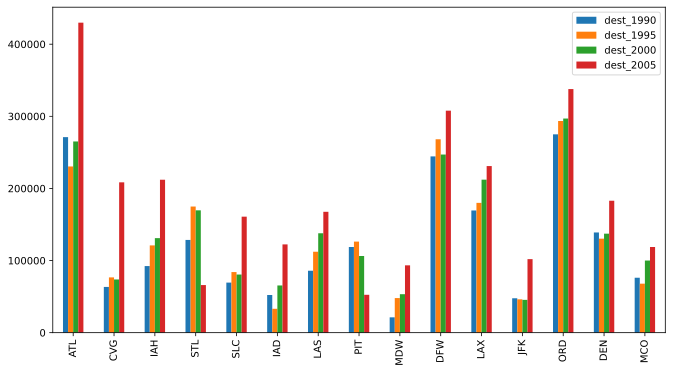

In [119]:
top_diff_df = origin_dest_counts_std.sort_values(by='std', ascending=False).head(15)
top_diff_df[['dest_1990', 'dest_1995', 'dest_2000', 'dest_2005']].plot.bar(figsize=(11, 6));

### Query and group by pairs `origin`-`dest`

In [129]:
def get_origin_dest_pairs(year):
    origin_dest = c.execute(select_origin_dest_query(year))
    df = pd.DataFrame(origin_dest.fetchall(), columns=['origin', 'dest'])
    return df.groupby(by=['origin', 'dest'])['origin'].count().sort_values(ascending=False)

In [127]:
origin_dest_1990 = get_origin_dest_pairs(1990)
origin_dest_1990.shape

(3707,)

In [130]:
origin_dest_1995 = get_origin_dest_pairs(1995)
origin_dest_1995.shape

(3359,)

In [131]:
origin_dest_2000 = get_origin_dest_pairs(2000)
origin_dest_2000.shape

(3345,)

In [132]:
origin_dest_2005 = get_origin_dest_pairs(2005)
origin_dest_2005.shape

(4724,)

In [143]:
origin_dest_pairs_counts = pd.concat([origin_dest_1990, origin_dest_1995, origin_dest_2000, origin_dest_2005], axis=1)
origin_dest_pairs_counts.columns = ['1990', '1995', '2000', '2005']
origin_dest_pairs_counts.head(10)

1990     1995     2000     2005
origin dest                                    
SFO    LAX   26134.0  16959.0  15967.0   8503.0
LAX    SFO   25779.0  17272.0  16021.0   8427.0
       PHX   13121.0  15593.0  16652.0  10820.0
PHX    LAX   12938.0  15598.0  17041.0  10819.0
LAX    LAS   10559.0  17536.0  17745.0  12536.0
HOU    DAL   10475.0  12235.0  11999.0   9541.0
LGA    ORD   10344.0  11455.0  11531.0  11470.0
PHX    LAS   10298.0  12688.0  12906.0  10917.0
LAS    LAX   10157.0  17340.0  16899.0  12519.0
ORD    MSP   10133.0  15045.0  12993.0   9760.0

In [144]:
origin_dest_pairs_counts.shape

(6073, 4)

In [145]:
origin_dest_pairs_counts.dropna(inplace=True)
std = origin_dest_pairs_counts.std(axis=1)
mean = origin_dest_pairs_counts.mean(axis=1)
origin_dest_pairs_counts = pd.concat([origin_dest_pairs_counts, std, std / mean], axis=1)
origin_dest_pairs_counts.columns = list(origin_dest_pairs_counts.columns[:-2]) + ['std', 'std/mean']
origin_dest_pairs_counts.sort_values(by='std', ascending=False).head(15)

1990     1995     2000     2005          std  std/mean
origin dest                                                           
SFO    LAX   26134.0  16959.0  15967.0   8503.0  7226.109897  0.427815
LAX    SFO   25779.0  17272.0  16021.0   8427.0  7107.199278  0.421174
       SAN    6536.0   3031.0   2575.0  15223.0  5861.336729  0.856764
SAN    LAX    7161.0   3535.0   2573.0  15237.0  5756.579858  0.807771
OAK    LAX    4207.0  13787.0  11944.0   9646.0  4153.769613  0.419742
LAX    OAK    4211.0  13593.0  11861.0   9665.0  4077.805415  0.414727
       LAS   10559.0  17536.0  17745.0  12536.0  3610.205627  0.247376
BOS    LGA    5726.0   5580.0   8647.0  13186.0  3559.791696  0.429680
PDX    SEA    9406.0   3481.0   1859.0   2025.0  3551.060534  0.846953
LAS    LAX   10157.0  17340.0  16899.0  12519.0  3479.104518  0.244512
DCA    LGA    5264.0   5548.0   8282.0  12753.0  3471.919774  0.436075
LGA    DCA    5279.0   5548.0   8289.0  12734.0  3459.518126  0.434476
       BOS    6441.0   5580.0   8652.0  13161.0  3391.509841  0.400959
SJC    LAX    6186.0   4262.0  10861.0  10237.0  3183.352583  0.403646
LAX    SJC    6391.0   4283.0  10911.0  10234.0  3154.967340  0.396614

In [147]:
origin_dest_pairs_counts.sort_values(by='std/mean', ascending=False).head(15)

,,1990,1995,2000,2005,std,std/mean
origin,dest,,,,,,
PHL,EWR,5.0,1.0,2.0,671.0,334.170989,1.968607
LAX,SNA,1.0,1.0,31.0,2134.0,1061.594202,1.959565
IAD,DCA,31.0,1.0,1.0,1.0,15.000000,1.764706
JFK,PBI,360.0,301.0,333.0,3763.0,1716.002792,1.442929
PBI,JFK,363.0,302.0,333.0,3764.0,1715.847410,1.441283
LFT,IAH,886.0,2.0,3.0,2826.0,1331.322995,1.432685
MCO,SYR,356.0,7.0,1097.0,19.0,511.108191,1.382307
SYR,MCO,359.0,7.0,1097.0,19.0,511.083490,1.379443
MCI,OMA,319.0,759.0,1.0,1.0,358.814715,1.328943


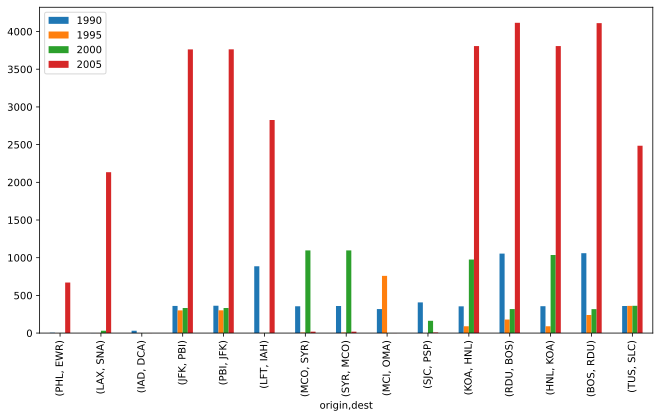

In [148]:
top_diff_df = origin_dest_pairs_counts.sort_values(by='std/mean', ascending=False).head(15)
top_diff_df[['1990', '1995', '2000', '2005']].plot.bar(figsize=(11, 6));